# Sprint 2: Data Preparation

### Loading data from CSV file

In [99]:
# import og nesecery libraries

import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [100]:
start_date = "1962-01-02"
end_date = "2024-09-12"

In [101]:
# merged dataset consists of stock, inflation and interest

df = pd.read_csv('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/merged data sets.csv', index_col=0)

In [102]:
# Consumer Price Index (CPI)

cpi = pdr.get_data_fred('CPIAUCSL', start=start_date, end=end_date)
cpi = cpi.ffill().reset_index()

In [103]:
#Unemployment Rate
unemployment_rate = pdr.get_data_fred('UNRATE', start=start_date, end=end_date)
unemployment_rate = unemployment_rate.ffill().reset_index()

In [104]:
#Gross Domestic Product (GDP)
gdp = pdr.get_data_fred('GDP', start=start_date, end=end_date)
gdp = gdp.ffill().reset_index()

In [105]:
gdp

,DATE,GDP
0,1962-04-01,600.366
1,1962-07-01,609.027
2,1962-10-01,612.280
3,1963-01-01,621.672
4,1963-04-01,629.752
...,...,...
244,2023-04-01,27063.012
245,2023-07-01,27610.128
246,2023-10-01,27956.998
247,2024-01-01,28269.174


In [106]:
df['CPI'] = cpi['CPIAUCSL']
df['Unemployment Rate'] = unemployment_rate['UNRATE']
#df['GDP'] = gdp['GDP']

In [107]:
gdp

,DATE,GDP
0,1962-04-01,600.366
1,1962-07-01,609.027
2,1962-10-01,612.280
3,1963-01-01,621.672
4,1963-04-01,629.752
...,...,...
244,2023-04-01,27063.012
245,2023-07-01,27610.128
246,2023-10-01,27956.998
247,2024-01-01,28269.174


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 0 to 807
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          808 non-null    object 
 1   Open                          808 non-null    float64
 2   High                          808 non-null    float64
 3   Low                           808 non-null    float64
 4   Close                         808 non-null    float64
 5   Adj Close                     808 non-null    float64
 6   Volume                        808 non-null    float64
 7   Effective Federal Funds Rate  808 non-null    float64
 8   Inflation Rate                808 non-null    float64
 9   CPI                           808 non-null    float64
 10  Unemployment Rate             808 non-null    float64
dtypes: float64(10), object(1)
memory usage: 75.8+ KB


In [109]:
df = df.ffill()

In [110]:
merged_data = df.copy()

In [111]:
merged_data['CPI'] = cpi['CPIAUCSL']
merged_data['Unemployment Rate'] = unemployment_rate['UNRATE']
#merged_data['GDP'] = gdp['GDP'] --> missing a lot of data and has a correlation value of ,48

merged_data.ffill()

,Date,Open,High,Low,Close,Adj Close,Volume,Effective Federal Funds Rate,Inflation Rate,CPI,Unemployment Rate
0,1962-01-01,0.000000,3.553512,3.448997,3.475125,0.570977,254509.0,2.15,1.3,30.110,5.5
1,1962-02-01,0.000000,3.573108,3.435932,3.553512,0.583857,319571.0,2.37,1.3,30.170,5.6
2,1962-03-01,0.000000,3.520851,3.448997,3.475125,0.572706,139693.0,2.85,1.6,30.210,5.6
3,1962-04-01,0.000000,3.651495,3.625366,3.644962,0.600695,116730.0,2.78,1.3,30.240,5.5
4,1962-05-01,0.000000,3.422868,3.292224,3.403271,0.560864,359757.0,2.36,1.6,30.210,5.5
...,...,...,...,...,...,...,...,...,...,...,...
803,2016-07-01,146.438126,147.224075,146.245819,146.772568,109.611809,2309356.0,0.39,2.2,314.121,4.2
804,2016-08-01,148.060196,149.280930,148.060196,149.071899,111.328987,1911686.0,0.40,2.3,314.121,4.2
805,2016-09-01,149.924744,150.643814,149.498322,150.484955,113.084549,1309979.0,0.40,2.2,314.121,4.2
806,2016-10-01,146.596985,147.115387,145.819397,146.354507,109.980614,2135578.0,0.40,2.1,314.121,4.2


In [112]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 0 to 807
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          808 non-null    object 
 1   Open                          808 non-null    float64
 2   High                          808 non-null    float64
 3   Low                           808 non-null    float64
 4   Close                         808 non-null    float64
 5   Adj Close                     808 non-null    float64
 6   Volume                        808 non-null    float64
 7   Effective Federal Funds Rate  808 non-null    float64
 8   Inflation Rate                808 non-null    float64
 9   CPI                           751 non-null    float64
 10  Unemployment Rate             751 non-null    float64
dtypes: float64(10), object(1)
memory usage: 75.8+ KB


<Axes: xlabel='Date'>

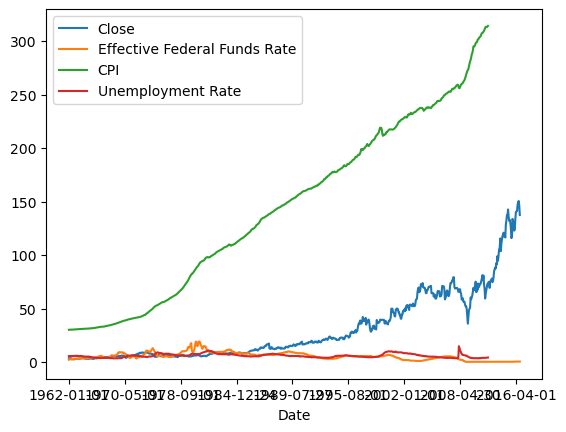

In [113]:
merged_data.plot.line(y=['Close', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate'] , x='Date')

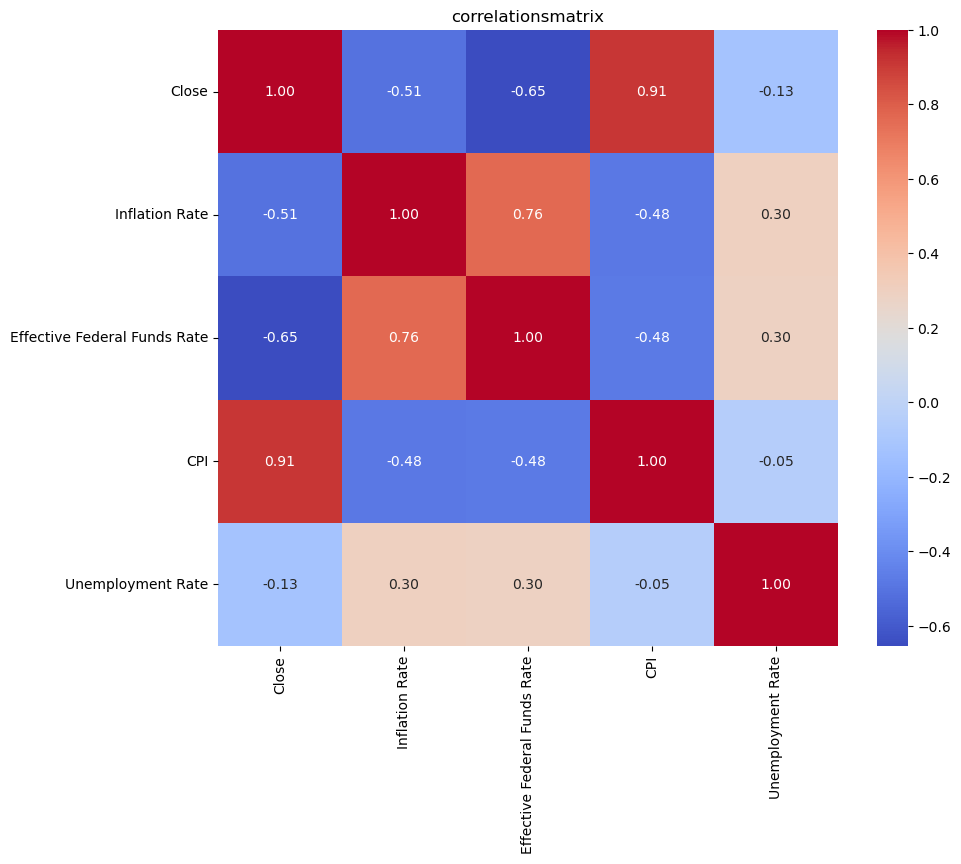

In [115]:
#Beregn korrelation
correlation_matrix = merged_data[['Close', 'Inflation Rate', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

## Now normalizing the data set to see if it makes any difference

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
# Laver en kopi af DataFrame uden dato kolonnen (som ikke skal normaliseres)
df_no_date = merged_data.drop(columns=['Date'])

# Initialiserer MinMaxScaler
scaler = MinMaxScaler()

# Anvender skaleringen på dataene
df_scaled = scaler.fit_transform(df_no_date)

# Konverterer tilbage til en DataFrame med de samme kolonnenavne
df_scaled = pd.DataFrame(df_scaled, columns=df_no_date.columns)

# Tilføj dato kolonnen tilbage
# df_scaled['Date'] = df['Date']

df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume,Effective Federal Funds Rate,Inflation Rate,CPI,Unemployment Rate
0,0.0,0.006924,0.006841,0.006840,0.001452,0.013576,0.109301,0.053846,0.000000,0.184211
1,0.0,0.007056,0.006752,0.007370,0.001566,0.018286,0.120862,0.053846,0.000211,0.192982
2,0.0,0.006703,0.006841,0.006840,0.001468,0.005264,0.146085,0.076923,0.000352,0.192982
3,0.0,0.007586,0.008040,0.007987,0.001716,0.003602,0.142407,0.053846,0.000458,0.184211
4,0.0,0.006042,0.005775,0.006355,0.001362,0.021196,0.120336,0.076923,0.000352,0.184211


In [118]:
df_scaled_with_date = df_scaled.copy()

df_scaled_with_date['Date'] = df['Date']

df_scaled_with_date

,Open,High,Low,Close,Adj Close,Volume,Effective Federal Funds Rate,Inflation Rate,CPI,Unemployment Rate,Date
0,0.000000,0.006924,0.006841,0.006840,0.001452,0.013576,0.109301,0.053846,0.000000,0.184211,1962-01-01
1,0.000000,0.007056,0.006752,0.007370,0.001566,0.018286,0.120862,0.053846,0.000211,0.192982,1962-02-01
2,0.000000,0.006703,0.006841,0.006840,0.001468,0.005264,0.146085,0.076923,0.000352,0.192982,1962-03-01
3,0.000000,0.007586,0.008040,0.007987,0.001716,0.003602,0.142407,0.053846,0.000458,0.184211,1962-04-01
4,0.000000,0.006042,0.005775,0.006355,0.001362,0.021196,0.120336,0.076923,0.000352,0.184211,1962-05-01
...,...,...,...,...,...,...,...,...,...,...,...
803,0.976744,0.976912,0.977882,0.974920,0.969180,0.162335,0.016816,0.123077,NaN,NaN,2016-07-01
804,0.987563,0.990799,0.990221,0.990454,0.984420,0.133546,0.017341,0.130769,NaN,NaN,2016-08-01
805,1.000000,1.000000,1.000000,1.000000,1.000000,0.089986,0.017341,0.123077,NaN,NaN,2016-09-01
806,0.977804,0.976178,0.974983,0.972096,0.972453,0.149754,0.017341,0.115385,NaN,NaN,2016-10-01


<Axes: xlabel='Date'>

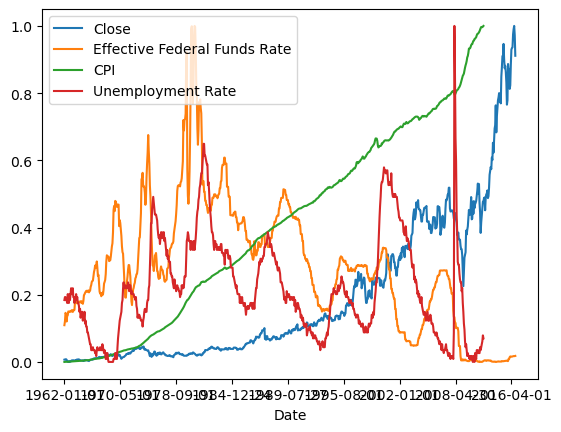

In [131]:
df_scaled_with_date.plot.line(y=['Close', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate'] , x='Date')

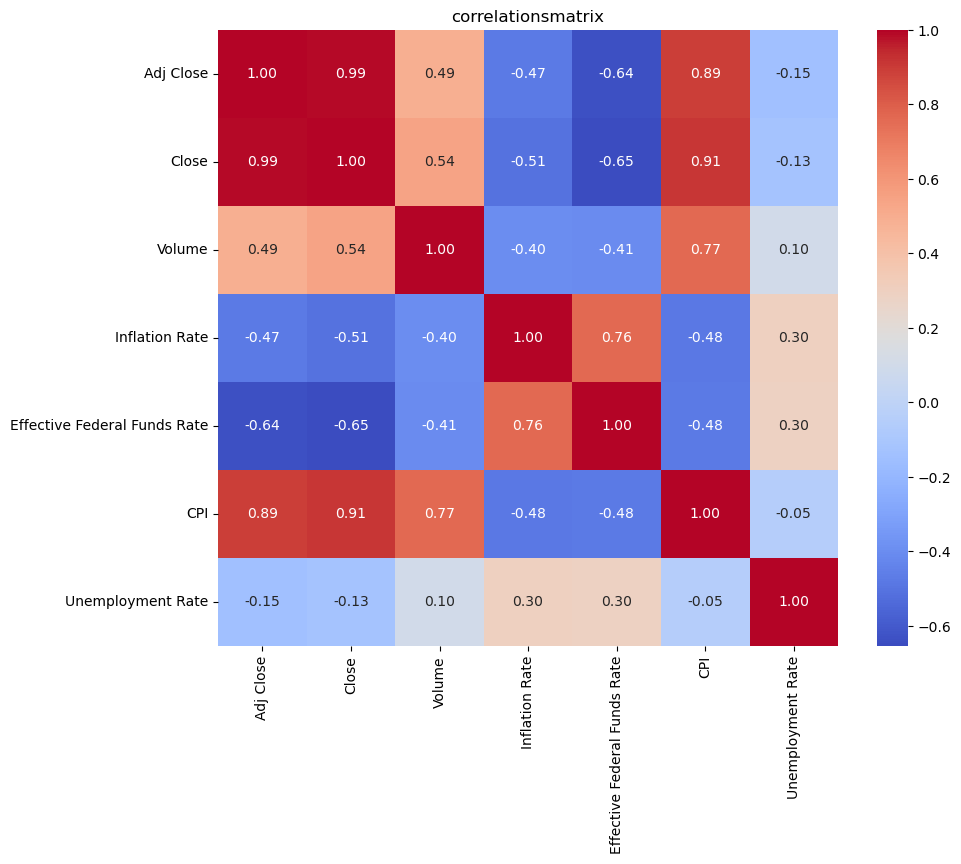

In [132]:
#Beregn korrelation
correlation_matrix_normalization = df_scaled[['Adj Close', 'Close', 'Volume', 'Inflation Rate', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_normalization, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

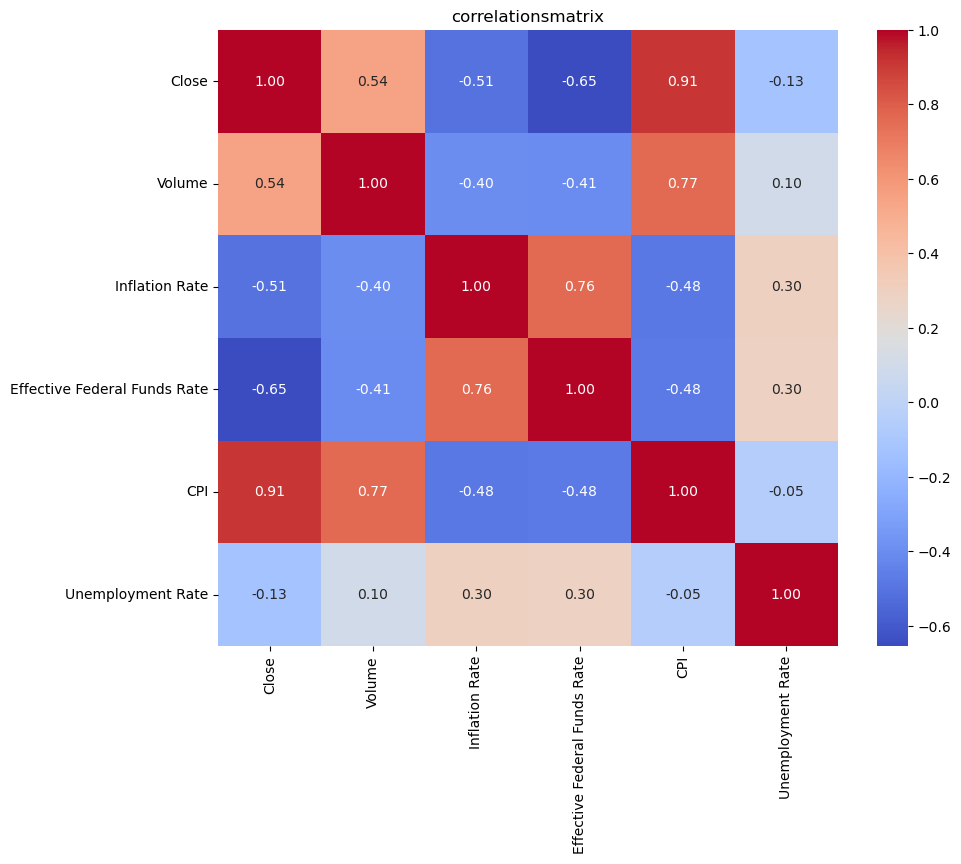

In [133]:
#Beregn korrelation
corrmat_high_only = df_scaled[['Close', 'Volume', 'Inflation Rate', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat_high_only, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

## Feature Engineering
Skaber nye variabler baseret på data jeg har. Jeg starter med at kigge ind i den procentvise ændring for renter, inflation, closing price, CPI, 

In [123]:
df_feature_engineering = df.copy()

In [124]:
df_feature_engineering

,Date,Open,High,Low,Close,Adj Close,Volume,Effective Federal Funds Rate,Inflation Rate,CPI,Unemployment Rate
0,1962-01-01,0.000000,3.553512,3.448997,3.475125,0.570977,254509.0,2.15,1.3,30.110,5.5
1,1962-02-01,0.000000,3.573108,3.435932,3.553512,0.583857,319571.0,2.37,1.3,30.170,5.6
2,1962-03-01,0.000000,3.520851,3.448997,3.475125,0.572706,139693.0,2.85,1.6,30.210,5.6
3,1962-04-01,0.000000,3.651495,3.625366,3.644962,0.600695,116730.0,2.78,1.3,30.240,5.5
4,1962-05-01,0.000000,3.422868,3.292224,3.403271,0.560864,359757.0,2.36,1.6,30.210,5.5
...,...,...,...,...,...,...,...,...,...,...,...
803,2016-07-01,146.438126,147.224075,146.245819,146.772568,109.611809,2309356.0,0.39,2.2,314.121,4.2
804,2016-08-01,148.060196,149.280930,148.060196,149.071899,111.328987,1911686.0,0.40,2.3,314.121,4.2
805,2016-09-01,149.924744,150.643814,149.498322,150.484955,113.084549,1309979.0,0.40,2.2,314.121,4.2
806,2016-10-01,146.596985,147.115387,145.819397,146.354507,109.980614,2135578.0,0.40,2.1,314.121,4.2


In [125]:
df_feature_engineering['Price Change %'] = df['Close'].pct_change()
df_feature_engineering['Inflation Change %'] = df['Inflation Rate'].pct_change()
df_feature_engineering['Interest Change %'] = df['Effective Federal Funds Rate'].pct_change()
df_feature_engineering['CPI Change %'] = df['CPI'].pct_change()
df_feature_engineering['Unemployment Rate Change %'] = df['Unemployment Rate'].pct_change()

In [126]:
df_feature_engineering.bfill()

,Date,Open,High,Low,Close,Adj Close,Volume,Effective Federal Funds Rate,Inflation Rate,CPI,Unemployment Rate,Price Change %,Inflation Change %,Interest Change %,CPI Change %,Unemployment Rate Change %
0,1962-01-01,0.000000,3.553512,3.448997,3.475125,0.570977,254509.0,2.15,1.3,30.110,5.5,0.022557,0.000000,0.102326,0.001993,0.018182
1,1962-02-01,0.000000,3.573108,3.435932,3.553512,0.583857,319571.0,2.37,1.3,30.170,5.6,0.022557,0.000000,0.102326,0.001993,0.018182
2,1962-03-01,0.000000,3.520851,3.448997,3.475125,0.572706,139693.0,2.85,1.6,30.210,5.6,-0.022059,0.230769,0.202532,0.001326,0.000000
3,1962-04-01,0.000000,3.651495,3.625366,3.644962,0.600695,116730.0,2.78,1.3,30.240,5.5,0.048872,-0.187500,-0.024561,0.000993,-0.017857
4,1962-05-01,0.000000,3.422868,3.292224,3.403271,0.560864,359757.0,2.36,1.6,30.210,5.5,-0.066308,0.230769,-0.151079,-0.000992,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2016-07-01,146.438126,147.224075,146.245819,146.772568,109.611809,2309356.0,0.39,2.2,314.121,4.2,0.040607,0.000000,0.026316,0.000000,0.000000
804,2016-08-01,148.060196,149.280930,148.060196,149.071899,111.328987,1911686.0,0.40,2.3,314.121,4.2,0.015666,0.045455,0.025641,0.000000,0.000000
805,2016-09-01,149.924744,150.643814,149.498322,150.484955,113.084549,1309979.0,0.40,2.2,314.121,4.2,0.009479,-0.043478,0.000000,0.000000,0.000000
806,2016-10-01,146.596985,147.115387,145.819397,146.354507,109.980614,2135578.0,0.40,2.1,314.121,4.2,-0.027448,-0.045455,0.000000,0.000000,0.000000


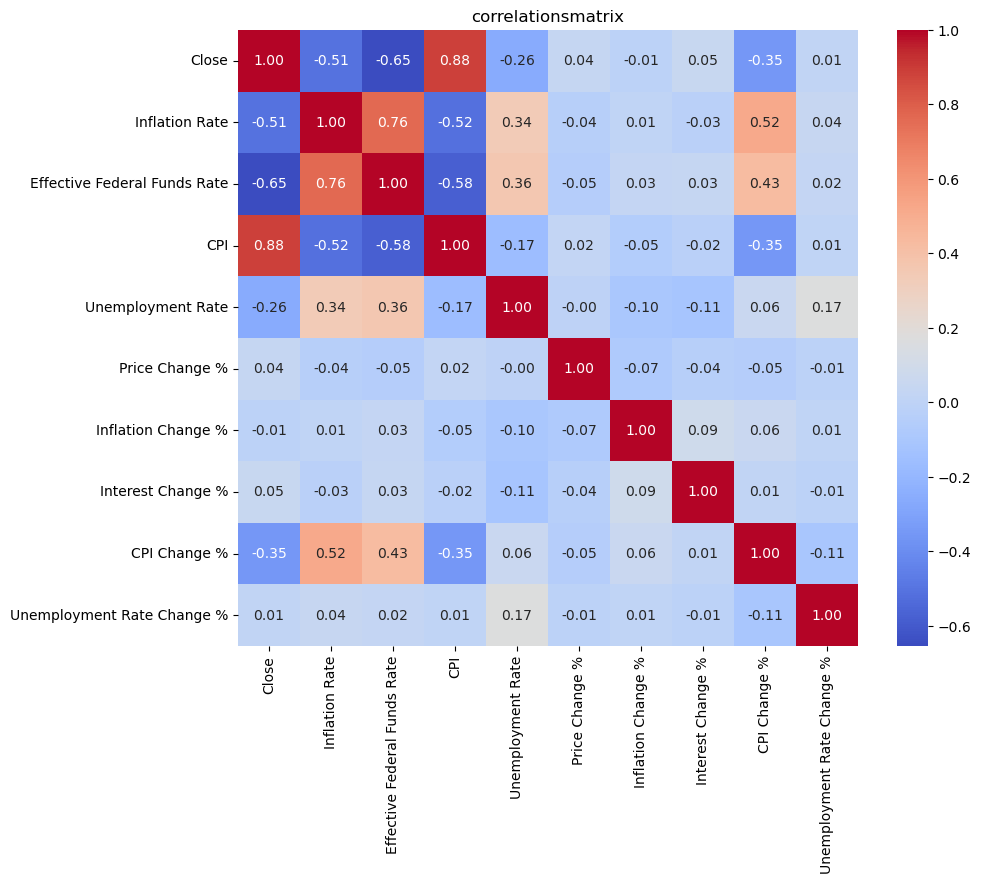

In [128]:
#Beregn korrelation
correlation_matrix_engineering = df_feature_engineering[['Close', 'Inflation Rate', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate', 'Price Change %', 'Inflation Change %', 'Interest Change %', 'CPI Change %', 'Unemployment Rate Change %' ]].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_engineering, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()